In [2]:
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
X_train[0].size

784

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X_train)

pca.n_components_

331

In [6]:
pca.explained_variance_ratio_

array([0.09699015, 0.07163954, 0.06148301, 0.05406752, 0.04875134,
       0.04318382, 0.03271483, 0.02885563, 0.02768302, 0.02345561,
       0.02109413, 0.02045392, 0.01703736, 0.01698015, 0.01580144,
       0.01495603, 0.01315251, 0.01277426, 0.01190316, 0.01153959,
       0.01063248, 0.01012944, 0.00959328, 0.00909792, 0.00885418,
       0.00837118, 0.00810657, 0.00793481, 0.00741106, 0.00691872,
       0.00656839, 0.00646837, 0.00597896, 0.00586467, 0.00567313,
       0.00543476, 0.00503635, 0.00486249, 0.00482143, 0.00468889,
       0.00457964, 0.00443223, 0.00415478, 0.00395286, 0.00383366,
       0.00375777, 0.00361952, 0.00349269, 0.00337961, 0.00318891,
       0.00315619, 0.00310466, 0.00295826, 0.00285977, 0.00283463,
       0.00270127, 0.0026751 , 0.00257637, 0.00254091, 0.00244868,
       0.00241491, 0.00239109, 0.00228991, 0.0022111 , 0.00212302,
       0.00206581, 0.00204149, 0.00194737, 0.00191839, 0.00188776,
       0.00186598, 0.00180085, 0.00175846, 0.00173275, 0.00164

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Extra code for plotting digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [8]:
pca = PCA(n_components=154, random_state=42)

X_reduced = pca.fit_transform(X_train)

X_recovered = pca.inverse_transform(X_reduced)



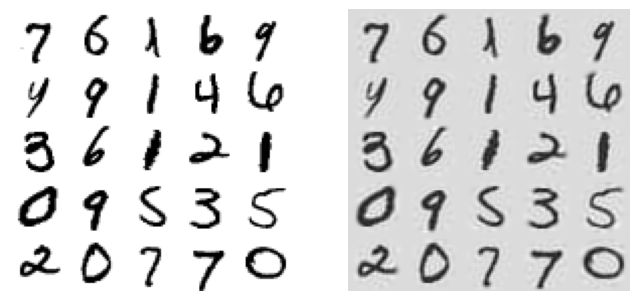

In [11]:
plt.figure(figsize=(8,6))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.show()

In [12]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True)




<function matplotlib.pyplot.show(close=None, block=None)>

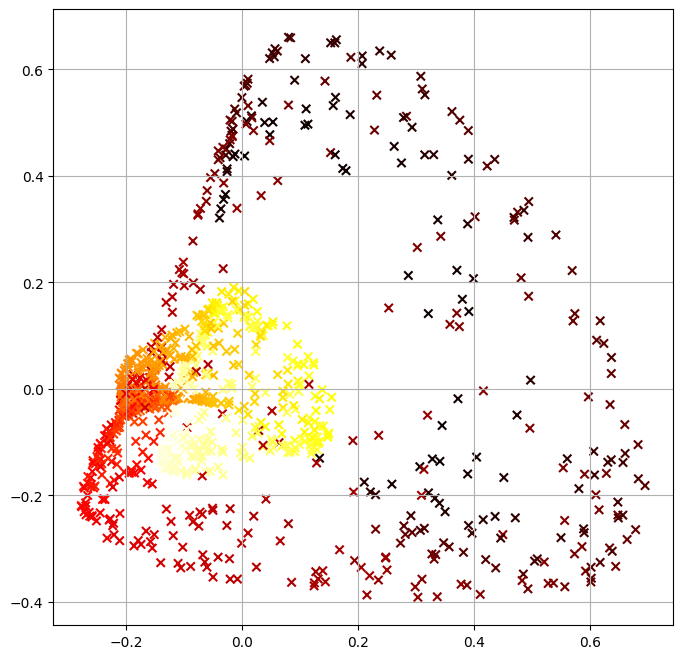

In [15]:
X_reduced = rbf_pca.fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker='x')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

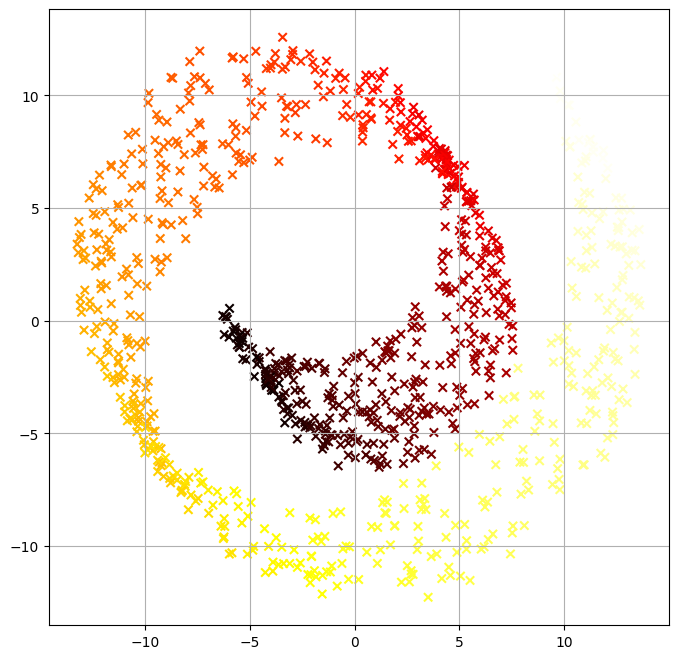

In [16]:
X_reduced = lin_pca.fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker='x')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

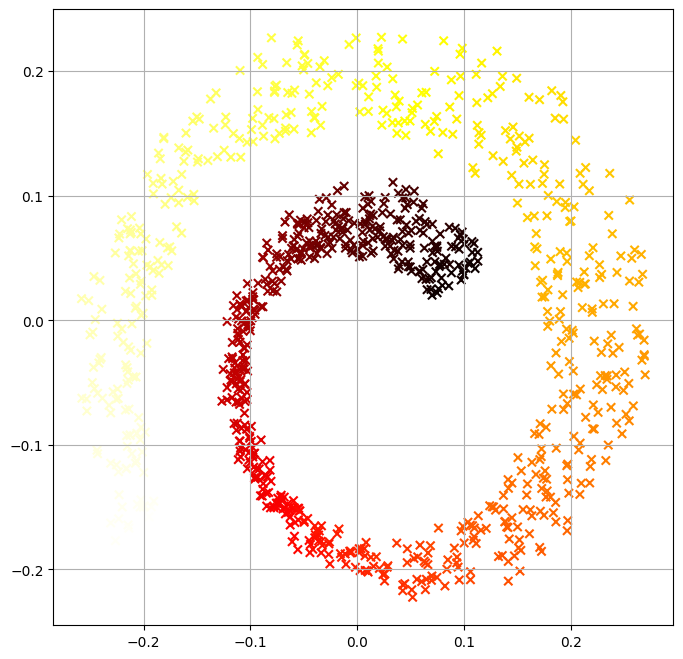

In [18]:
X_reduced = sig_pca.fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker='x')
plt.grid(True)
plt.show